c:\Users\yurav\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test MAE: 9.43
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


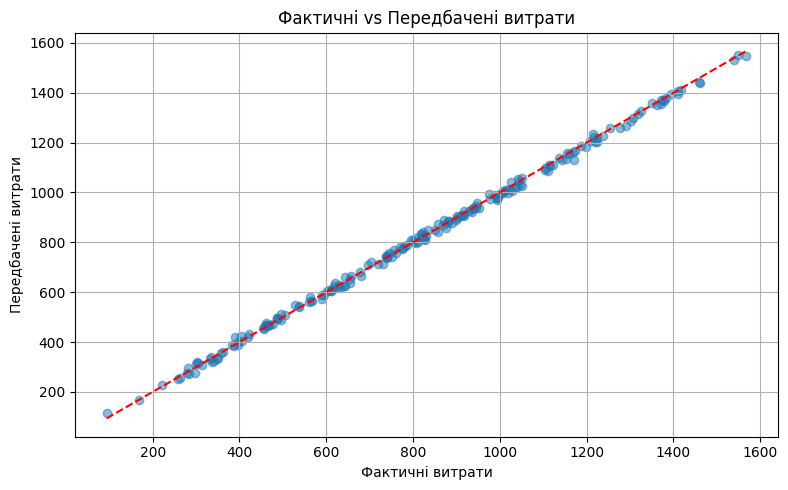

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

# 1. Генерація даних
np.random.seed(42)
n_samples = 1000
X = np.random.rand(n_samples, 3) * 100  # 3 ознаки: персонал, відстань, вантаж
y = 10 * X[:, 0] + 5 * X[:, 1] + 2 * X[:, 2] + np.random.randn(n_samples) * 10  # шум

# 2. Масштабування
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Розділення на train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Побудова моделі
model = Sequential([
    Dense(32, activation='relu', input_shape=(3,)),
    Dense(16, activation='relu'),
    Dense(1)  # вихід без активації (лінійна функція)
])

model.compile(optimizer=Adam(learning_rate=0.01), loss=MeanSquaredError(), metrics=['mae'])

# 5. Навчання
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

# 6. Оцінка моделі
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {mae:.2f}")

# 7. Візуалізація
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Фактичні витрати")
plt.ylabel("Передбачені витрати")
plt.title("Фактичні vs Передбачені витрати")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()
